In [2]:
#imports from modules

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np

import matplotlib.pyplot as plt
import os

import seaborn as sns
import geopandas as gp
from math import sqrt
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoLars
from sklearn.linear_model import TweedieRegressor

In [3]:
df = pd.read_csv('mfsnowcrab.csv')

In [4]:
df.head()

,id,latitude,longitude,year,name,sex,bottom_depth,surface_temperature,bottom_temperature,haul,cpue
0,147038,57.00000,-166.45000,1975,snow crab,male,71,9.1,1.1,117,40356
1,147037,57.00000,-167.08333,1975,snow crab,male,71,8.7,1.4,118,68691
2,147036,57.00000,-167.68333,1975,snow crab,male,75,8.8,1.6,139,119748
3,147035,56.66667,-172.56667,1975,snow crab,male,132,6.1,2.5,89,7882
4,147034,56.66667,-171.96667,1975,snow crab,male,123,5.7,2.1,90,11258


In [5]:
crab_loc = pd.DataFrame({'id': df.id})


In [6]:
crab_loc['latitude']  = df['latitude']

In [7]:
crab_loc['longitude'] = df['longitude']

In [8]:
crab_loc.head()

,id,latitude,longitude
0,147038,57.00000,-166.45000
1,147037,57.00000,-167.08333
2,147036,57.00000,-167.68333
3,147035,56.66667,-172.56667
4,147034,56.66667,-171.96667


In [9]:
gdf = gp.GeoDataFrame(crab_loc, geometry = gp.points_from_xy(crab_loc.longitude,
                                                                          crab_loc.latitude))

In [10]:
gdf.head()

,id,latitude,longitude,geometry
0,147038,57.00000,-166.45000,POINT (-166.45000 57.00000)
1,147037,57.00000,-167.08333,POINT (-167.08333 57.00000)
2,147036,57.00000,-167.68333,POINT (-167.68333 57.00000)
3,147035,56.66667,-172.56667,POINT (-172.56667 56.66667)
4,147034,56.66667,-171.96667,POINT (-171.96667 56.66667)


In [11]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world.head(500)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000 -16.55522, 179.36414 -16.80135, 178.725..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982, 37.69869 -3.09699, 37.76690 -3.67712, ..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948, -8.68440 27.39574, -8.68729 25.88106, ..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.97421 49.00254, -124.91024 49.98456, -125.62..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.00000 49.00000, -117.03121 49.00000, -116.04..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888, 19.59604 46.17173, 20.22019 46.12747, ..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009, 19.73805 42.68825, 19.30449 42.19575, ..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787, 20.28375 42.32026, 20.07070 42.58863, ..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.89000, -60.89500 10.85500, -60.93500 10.110..."


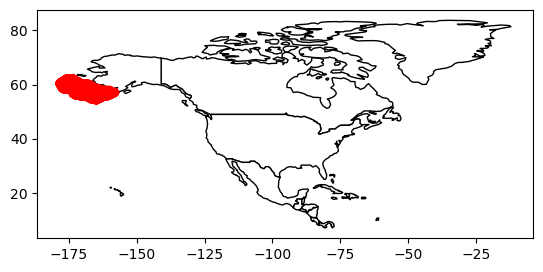

In [12]:
ax = world[world.continent == 'North America'].plot(color = 'white', edgecolor = 'black')
gdf.plot(ax = ax, color = 'red')
plt.show()



In [17]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000 -16.55522, 179.36414 -16.80135, 178.725..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982, 37.69869 -3.09699, 37.76690 -3.67712, ..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948, -8.68440 27.39574, -8.68729 25.88106, ..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.97421 49.00254, -124.91024 49.98456, -125.62..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.00000 49.00000, -117.03121 49.00000, -116.04..."


In [21]:
usa_data = gp.read_file(r'USA_adm2.shx')
  
usa_data.shape

(3148, 1)

In [27]:
adm2 = pd.read_csv('USA_adm2.csv')

In [28]:
adm2.shape

(3148, 12)

In [29]:
adm2['geometry'] = usa_data

In [30]:
adm2.head()

,OBJECTID,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,1,244,USA,United States,1,Alabama,1,Autauga,County,County,NaN,NaN,"POLYGON ((-86.81896209716791 32.34027099609386, -86.81083679199219 32.34712982177746, ..."
1,2,244,USA,United States,1,Alabama,2,Baldwin,County,County,NaN,NaN,"(POLYGON ((-87.51055908203125 30.3397216796875, -87.51083374023438 30.33944511413586, ..."
2,3,244,USA,United States,1,Alabama,3,Barbour,County,County,NaN,NaN,"POLYGON ((-85.13025665283203 31.76386070251476, -85.13504028320312 31.76803016662598, ..."
3,4,244,USA,United States,1,Alabama,4,Bibb,County,County,NaN,NaN,"POLYGON ((-87.42078399658203 32.87446212768566, -87.42028045654291 32.97188949584972, ..."
4,5,244,USA,United States,1,Alabama,5,Blount,County,County,NaN,NaN,"POLYGON ((-86.95321655273438 33.81542205810558, -86.95449066162104 33.84542083740234, ..."


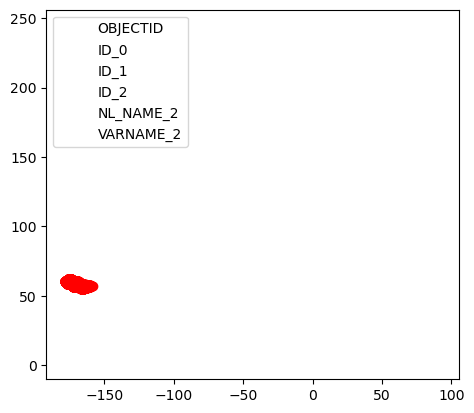

In [32]:
ax = adm2[adm2.NAME_1 == 'Alaska'].plot(color = 'white')
gdf.plot(ax = ax, color = 'red')
plt.show()


In [35]:
coast_data = gp.read_file(r'ne_10m_coastline.shp')
coast_data

,geometry
0,"LINESTRING (59.91603 -67.40049, 59.67856 -67.39414, 59.65748 -67.39723, 59.64625 -67.4..."
1,"LINESTRING (-51.73062 -82.06260, -52.18688 -82.11150, -52.64314 -82.16041, -52.93403 -..."
2,"LINESTRING (166.13697 -50.86435, 166.10711 -50.85231, 166.09588 -50.85125, 166.08961 -..."
3,"LINESTRING (-56.66832 -36.73642, -56.66487 -36.85101, -56.66885 -36.89422, -56.68643 -..."
4,"LINESTRING (-51.07939 3.49209, -51.09648 3.44902, -51.09274 3.37633, -51.03600 3.22921..."
...,...
4128,"LINESTRING (83.30511 70.80551, 83.37164 70.78828, 83.46941 70.73773, 83.44388 70.69131..."
4129,"LINESTRING (97.64568 76.75621, 97.64601 76.75381, 97.64796 76.74860, 97.63860 76.74132..."
4130,"LINESTRING (89.04713 77.14089, 89.13590 77.12711, 89.09858 77.09860, 89.04494 77.07709..."
4131,"LINESTRING (-66.77562 80.59858, -66.79027 80.59858, -66.80049 80.59947, -66.81041 80.6..."
